# Importações de libs e extracao de dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extração do dataset

In [2]:
data = pd.read_csv('datatran2020.csv', encoding='ISO-8859-1', delimiter=';')

# Analise exploratória

In [11]:
#Explorando as 5 primeiras linhas
data.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01


In [12]:
#Checando o scheema.
# Identificado que a coluna BR deveria ser strings, já que menciona numeros das Rodovias BR.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30901 entries, 0 to 30900
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      30901 non-null  int64 
 1   data_inversa            30901 non-null  object
 2   dia_semana              30901 non-null  object
 3   horario                 30901 non-null  object
 4   uf                      30901 non-null  object
 5   br                      30901 non-null  object
 6   km                      30817 non-null  object
 7   municipio               30901 non-null  object
 8   causa_acidente          30901 non-null  object
 9   tipo_acidente           30901 non-null  object
 10  classificacao_acidente  30901 non-null  object
 11  fase_dia                30901 non-null  object
 12  sentido_via             30901 non-null  object
 13  condicao_metereologica  30901 non-null  object
 14  tipo_pista              30901 non-null  object
 15  tr

In [13]:
#Convertido coluna br toda para inteiro e depois string.
data['br'] = data['br'].astype(str)

In [14]:
#Dados estatisticos de colunas numericas
data.describe()

,id,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,30901.000000,30901.000000,30901.000000,30901.000000,30901.000000,30901.000000,30901.000000,30901.000000,30901.000000
mean,350106.758131,2.295589,0.079933,0.835216,0.266755,0.959516,0.154170,1.101971,1.649817
std,10502.957089,1.609057,0.327912,0.933395,0.585591,1.312923,0.420184,1.016079,0.710432
min,331693.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,341090.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,350200.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,359111.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,374253.000000,57.000000,19.000000,31.000000,23.000000,53.000000,8.000000,33.000000,11.000000


# 5 Rodovias com mais acidentes

In [15]:
#Extracao das 5 rodovias com mais acidentes
data['br'].value_counts().head(5)

br
101.0    5515
116.0    4621
40.0     1517
381.0    1381
153.0    1161
Name: count, dtype: int64

In [20]:
rodovias_selecionadas = ['101.0', '116.0', '40.0', '381.0', '153.0']
data_top_brs = data[data['br'].isin(rodovias_selecionadas)]
data_top_brs.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01
5,331702,2021-01-01,sexta-feira,01:20:00,BA,116.0,0,VITORIA DA CONQUISTA,Velocidade Incompatível,Saída de leito carroçável,...,0,1,0,1,1,"-14,82741339","-40,82885465",SR-BA,UOP01,DEL08


In [40]:
#Agrupado pelas 5 brs com mais acidente e por tipo de acidente.
top5_brs_counts = data_top_brs.groupby(['br']).size().reset_index(name='contagem').sort_values('contagem', ascending=False)
print(top5_brs_counts)

      br  contagem
0  101.0      5515
1  116.0      4621
4   40.0      1517
3  381.0      1381
2  153.0      1161


Text(0.5, 0, 'Rodovias (Brs)')

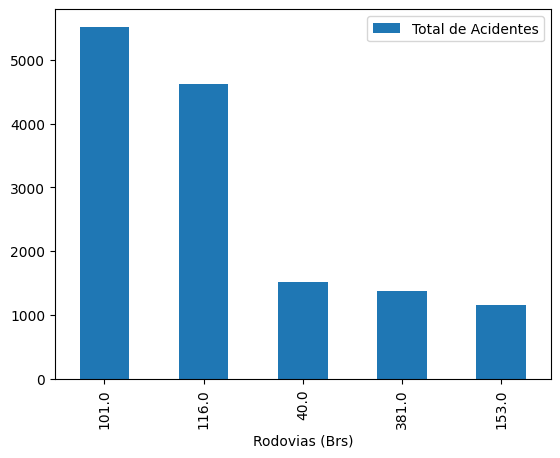

In [42]:
top5_brs_counts.plot.bar(x='br', y='contagem', label='Total de Acidentes')
plt.xlabel('Rodovias (Brs)')

# Acidentes por mês

In [47]:
#Convertendo a coluna para datetime.
data['data_inversa'] = pd.to_datetime(data['data_inversa'], format='%Y-%m-%d')

In [49]:
#Conferindo se houve a conversão
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30901 entries, 0 to 30900
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      30901 non-null  int64         
 1   data_inversa            30901 non-null  datetime64[ns]
 2   dia_semana              30901 non-null  object        
 3   horario                 30901 non-null  object        
 4   uf                      30901 non-null  object        
 5   br                      30901 non-null  object        
 6   km                      30817 non-null  object        
 7   municipio               30901 non-null  object        
 8   causa_acidente          30901 non-null  object        
 9   tipo_acidente           30901 non-null  object        
 10  classificacao_acidente  30901 non-null  object        
 11  fase_dia                30901 non-null  object        
 12  sentido_via             30901 non-null  object

In [54]:
#Criando a coluna mês com base na coluna data inversa
data['mes'] = data['data_inversa'].dt.to_period('M')

In [59]:
data.groupby(['mes']).size().reset_index(name='contagem')

,mes,contagem
0,2021-01,5457
1,2021-02,4973
2,2021-03,4754
3,2021-04,4846
4,2021-05,5576
5,2021-06,5295
